<a href="https://colab.research.google.com/github/Kristin33/Composer-Clustering/blob/master/auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Kristin33/Composer-Clustering

fatal: destination path 'Composer-Clustering' already exists and is not an empty directory.


In [0]:
"""
===========================================================
Get the piano roll encoding of midi files 
===========================================================

Attempt of using autoencoders to encode the pianoroll representation
into a lower dimension latent representation. 

currently, the input of the piano roll is of dimension 1280000

"""

def get_test_data():
    
    data_dir = "New_Data_Selection/"
    bach_dir = "bach_lute_(c)contributors-kunstderfuge/"
    scriabin_dir = "scriabin_(c)contributors-kunstderfuge/"
    byrd_dir = "byrd_(c)contributors-kunstderfuge/"
    beethoven_dir = "beethoven_iii_(c)contributors-kunstderfuge/"

    comp1_data, comp1_label = [], []
    comp2_data, comp2_label = [], []

    for filename in os.listdir(data_dir + scriabin_dir):
        if ".mid" in filename:
            print(filename)
            midi_data = pretty_midi.PrettyMIDI(data_dir + scriabin_dir + filename)
            l = midi_data.get_end_time()
            # scale the sampling frequency by the length of data, so the picture is 
            # of the same size
            fs = 100 * (10000/(l * 50 - 1))
            # beethoven_data.append(get_piano_roll_matrix(midi_data, 48, 96, fs=fs, draw=True))
            # plt.figure(figsize=(8,6))
            comp1_data.append(get_piano_roll_matrix(midi_data,36,108,fs=fs,draw=False))
            # plt.title('piano roll plot of file: {}'.format(file_name))
            # plt.show()
            comp1_label.append(1)

    for filename in os.listdir(data_dir + byrd_dir):
        if ".mid" in filename:
            print(filename)
            midi_data = pretty_midi.PrettyMIDI(data_dir + byrd_dir + filename)
            l = midi_data.get_end_time()
            # scale the sampling frequency by the length of data, so the picture is 
            # of the same size
            fs = 50 * (10000/(l * 50 - 1))
            # bach_data.append(get_piano_roll_matrix(midi_data, 48, 96, fs=fs))
            # plt.figure(figsize=(8,6))
            comp2_data.append(get_piano_roll_matrix(midi_data,36,108,fs=fs,draw=False))
            # plt.title('piano roll plot of file: {}'.format(file_name))
            # plt.show()
            comp2_label.append(0)

    data = np.array(comp2_data + comp1_data)
    labels = np.array(comp2_label + comp1_label)

    return data, labels


def get_train_data():
    
    data_dir = "New_Data_Selection/"
    bach_dir = "bach_concertos_(c)contributors-kunstderfuge/"
    beethoven_dir = "beethoven_i_(c)contributors-kunstderfuge/"

    bach_data, bach_label = [], []
    beethoven_data, beethoven_label = [], []

    for filename in os.listdir(data_dir + beethoven_dir):
        if ".mid" in filename:
            print(filename)
            midi_data = pretty_midi.PrettyMIDI(data_dir + beethoven_dir + filename)
            l = midi_data.get_end_time()
            # scale the sampling frequency by the length of data, so the picture is 
            # of the same size
            fs = 100 * (10000/(l * 50 - 1))
            # beethoven_data.append(get_piano_roll_matrix(midi_data, 48, 96, fs=fs, draw=True))
            plt.figure(figsize=(8,6))
            beethoven_data.append(get_piano_roll_matrix(midi_data,36,108,fs=fs,draw=False))
            plt.title('piano roll plot of file: {}'.format(file_name))
            # plt.show()
            beethoven_label.append(1)

    for filename in os.listdir(data_dir + bach_dir):
        if ".mid" in filename:
            print(filename)
            midi_data = pretty_midi.PrettyMIDI(data_dir + bach_dir + filename)
            l = midi_data.get_end_time()
            # scale the sampling frequency by the length of data, so the picture is 
            # of the same size
            fs = 50 * (10000/(l * 50 - 1))
            # bach_data.append(get_piano_roll_matrix(midi_data, 48, 96, fs=fs))
            plt.figure(figsize=(8,6))
            bach_data.append(get_piano_roll_matrix(midi_data,36,108,fs=fs,draw=False))
            plt.title('piano roll plot of file: {}'.format(file_name))
            # plt.show()
            bach_label.append(0)

    data = np.array(bach_data + beethoven_data)
    labels = np.array(bach_label + beethoven_label)

    return data, labels



In [15]:
"""
===========================================================
Auto encoders
===========================================================

Attempt of using autoencoders to encode the pianoroll representation
into a lower dimension latent representation. 

currently, the input of the piano roll is of dimension 1280000


"""
%cd Composer-Clustering/

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam


# %load pianoroll_representation.py
# from pianoroll_representation import *




[Errno 2] No such file or directory: 'Composer-Clustering/'
/content/Composer-Clustering


etude_56_4_(c)dery.mid
poeme-nocturne_61_(c)lefeldt.mid
morceaux_52_3_(c)lefeldt.mid
etude_42_3_(c)dery.mid
prelude_33_2_(c)lefeldt.mid
etude_8_10_(c)dery.mid
mazurka_3_6_(c)dery.mid
etude_42_6_(c)dery.mid
piece_59_1_(c)lefeldt.mid
mazurka_3_3_(c)dery.mid
etude_42_2_(c)dery.mid
mazurka_3_9_(c)dery.mid
etude_42_4_(c)lefeldt.mid
prelude_74_5_(c)lefeldt.mid
poeme_32_2_(c)lefeldt.mid
prelude_11_14_(c)lefeldt.mid
etude_8_11_(c)lefeldt.mid
piece_59_2_(c)lefeldt.mid
prelude_48_3_(c)lefeldt.mid
etude_42_1_(c)lefeldt.mid
etude_8_2_(c)dery.mid
poeme_satanique_36_(c)lefeldt.mid
mazurka_3_5_(c)dery.mid
etude_8_1_(c)dery.mid
etude_8_2_(c)lefeldt.mid
poeme_tragique_34_(c)lefeldt.mid
etude_8_9_(c)dery.mid
prelude_51_2_(c)lefeldt.mid
etude_42_5_(c)dery.mid
etude_8_7_(c)dery.mid
sonate_7_64_(c)lefeldt.mid
etude_8_4_(c)dery.mid
poeme_32_1_(c)lefeldt.mid
prelude_56_1_(c)lefeldt.mid
prelude_11_5_(c)lefeldt.mid
etude_65_2_(c)dery.mid
prelude_74_1_(c)lefeldt.mid
etude_8_11_(c)dery.mid
mazurka_3_8_(c)dery.mi

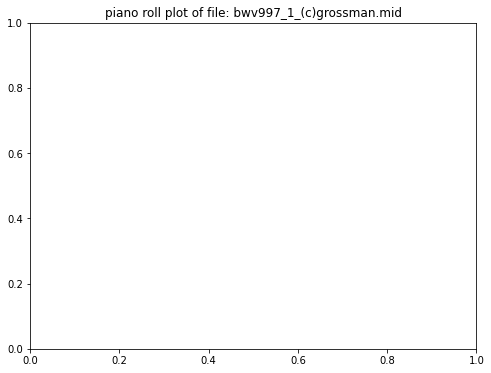

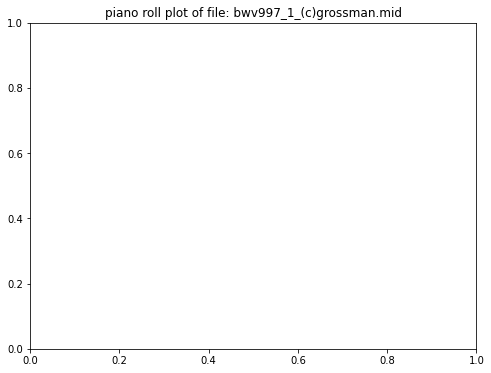

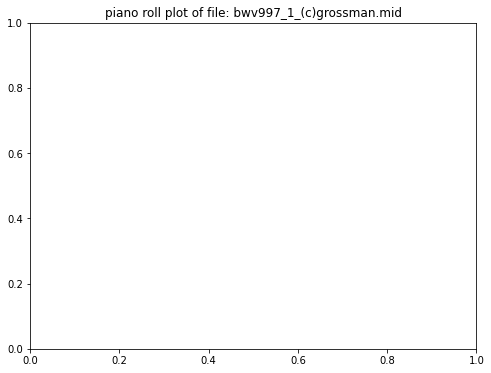

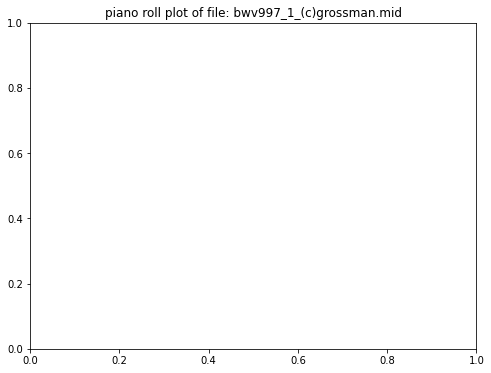

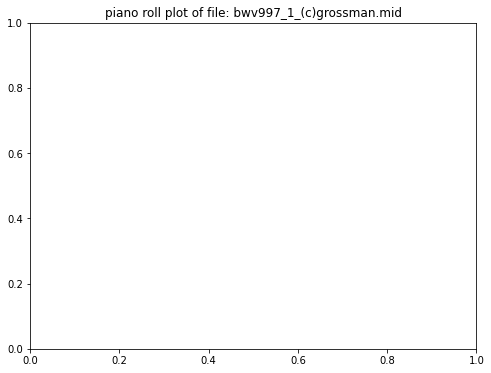

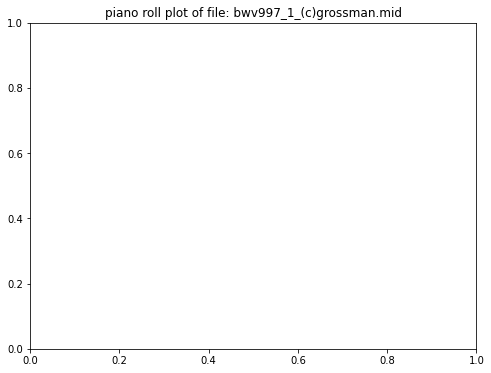

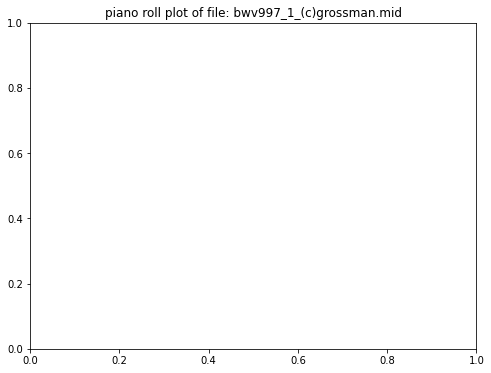

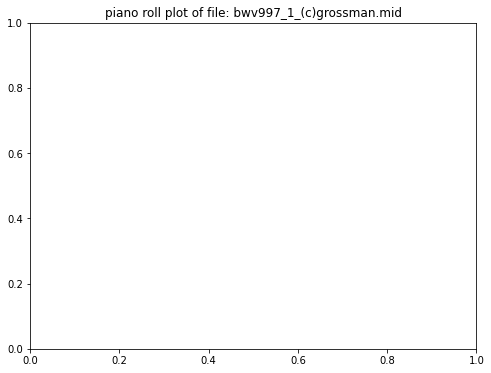

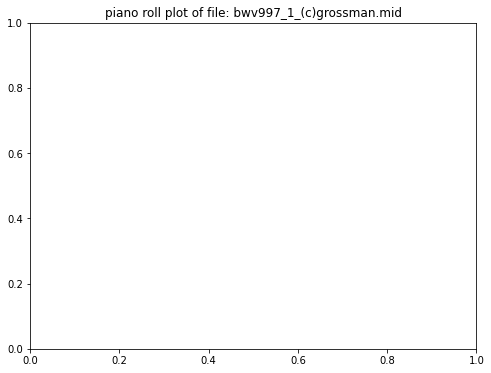

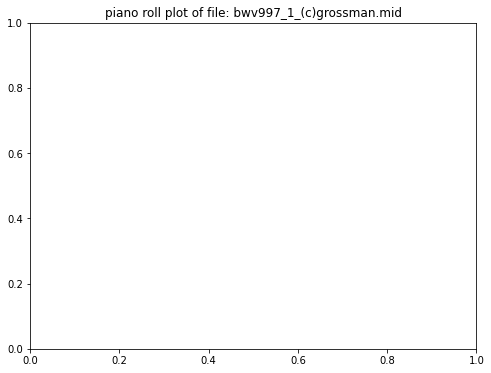

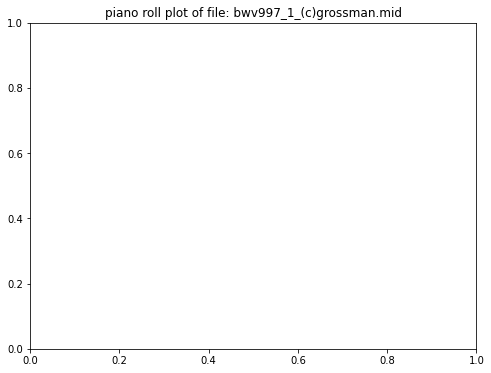

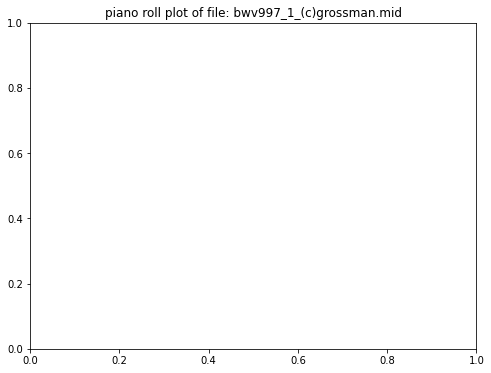

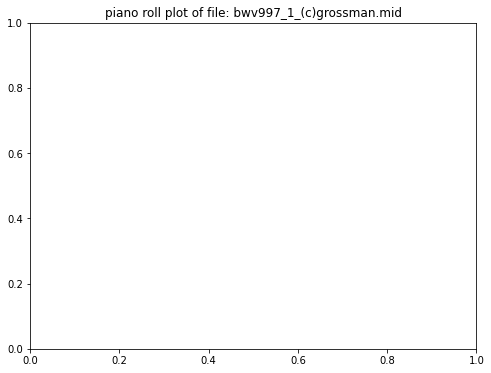

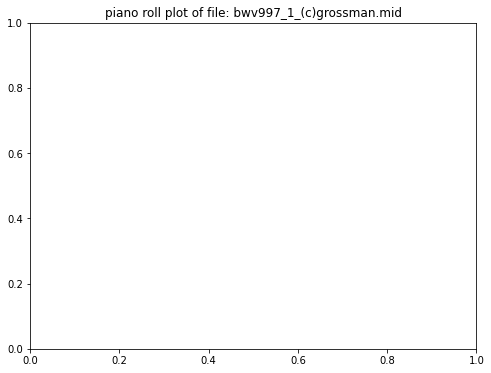

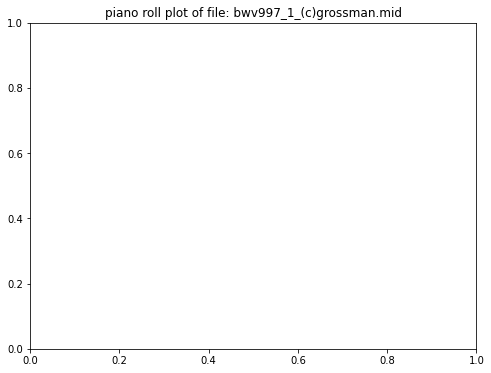

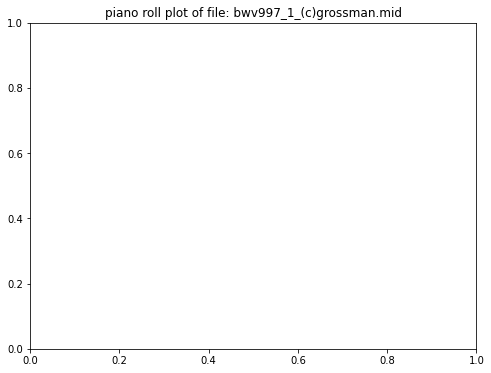

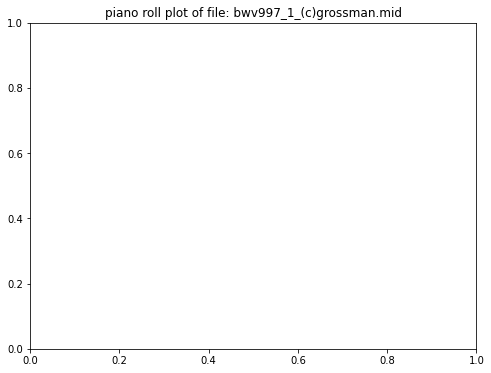

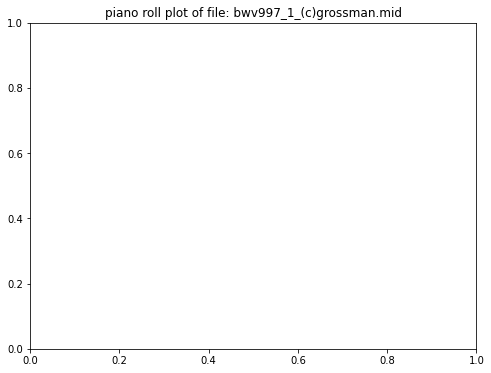

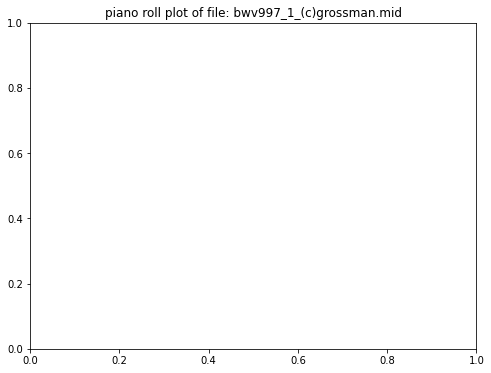

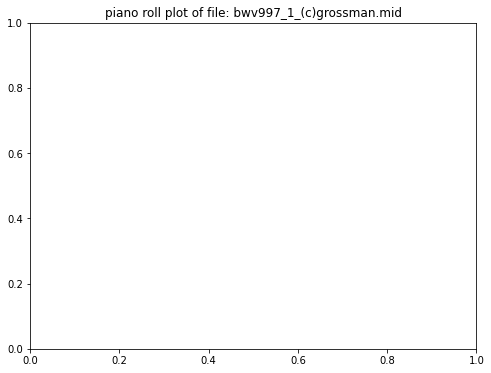

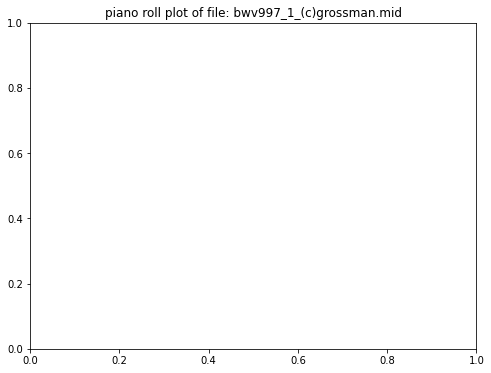

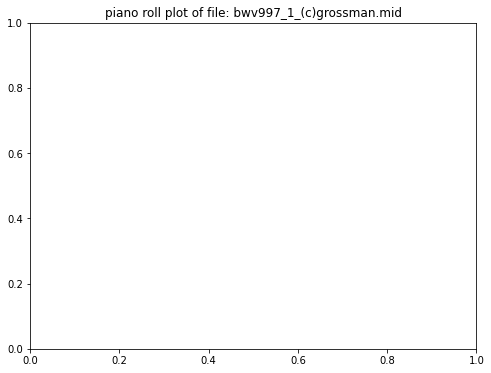

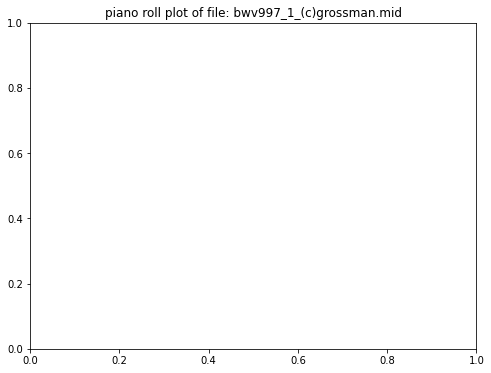

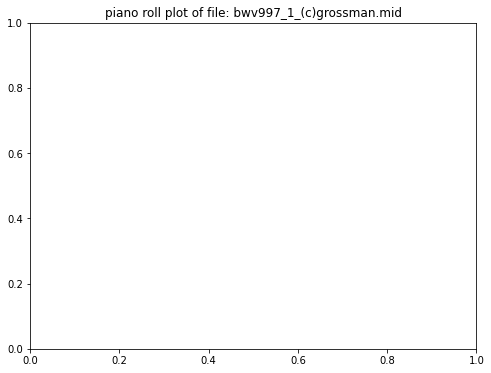

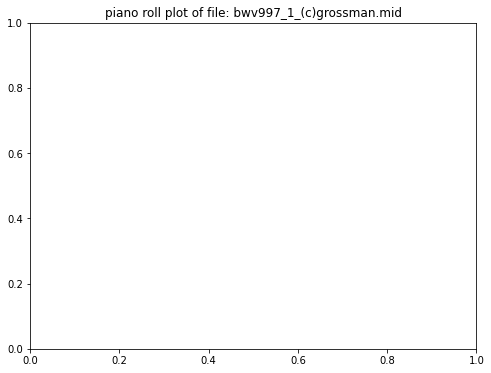

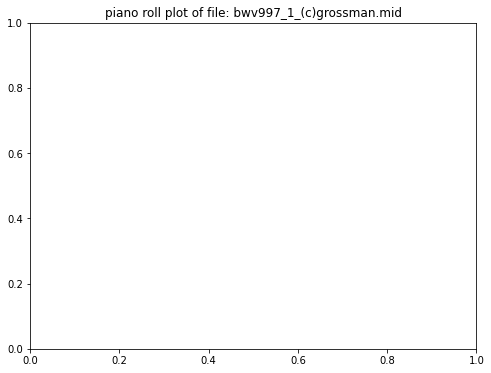

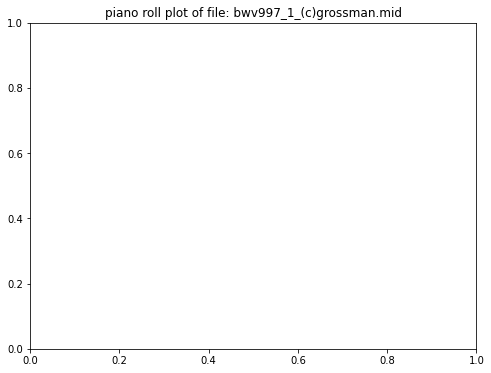

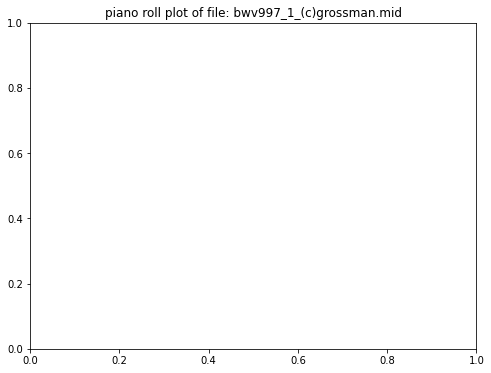

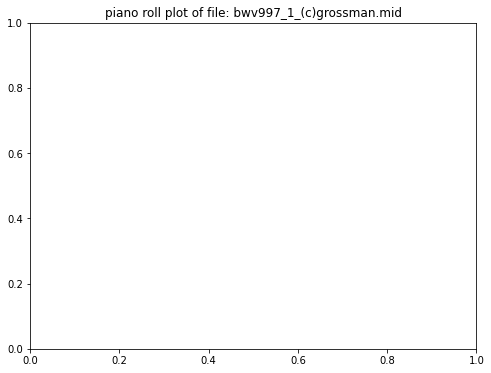

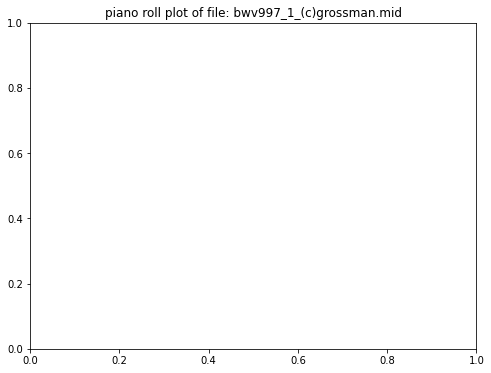

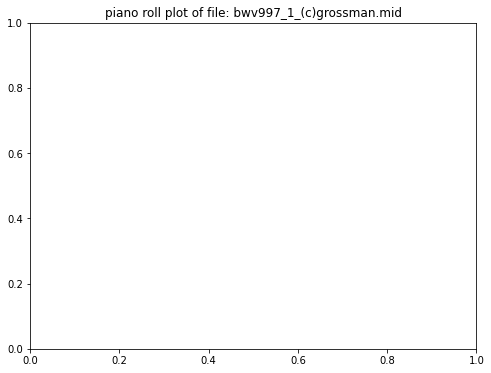

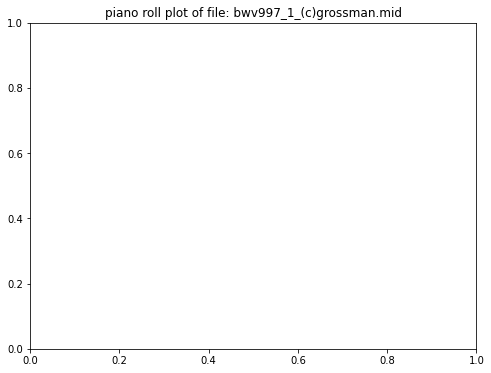

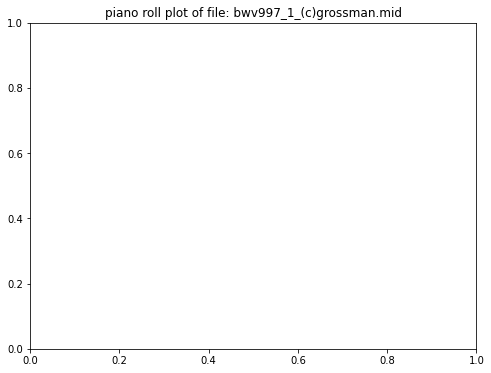

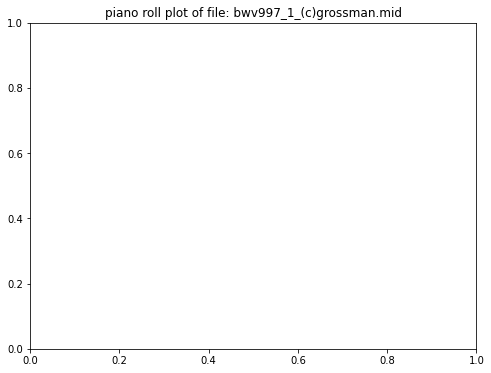

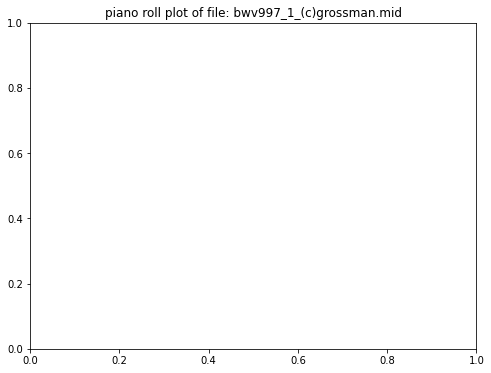

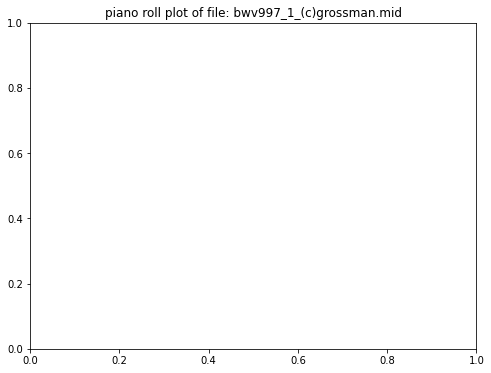

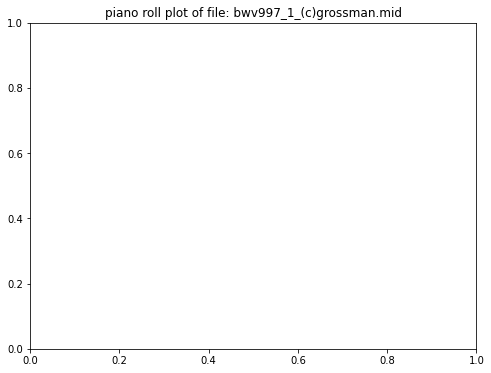

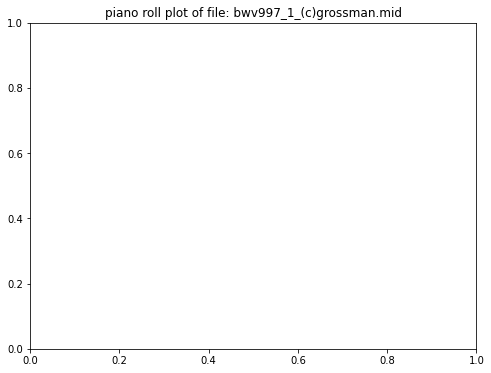

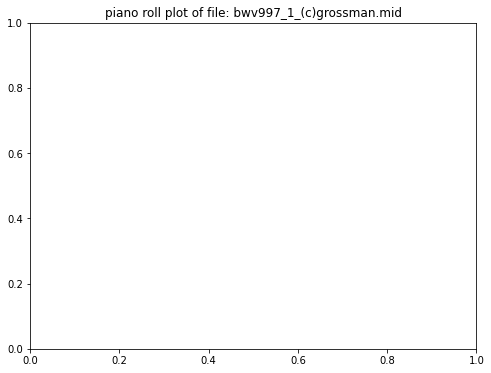

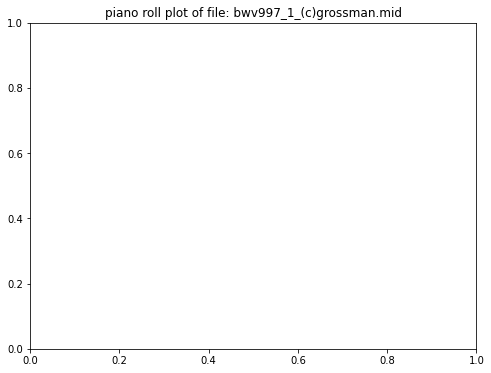

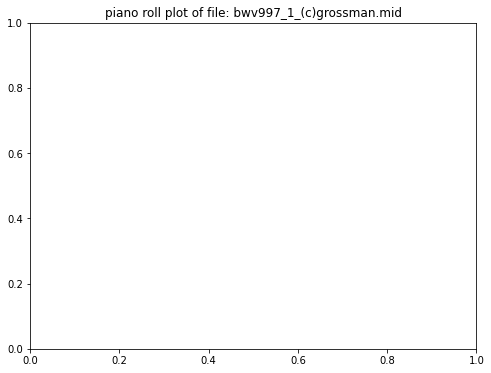

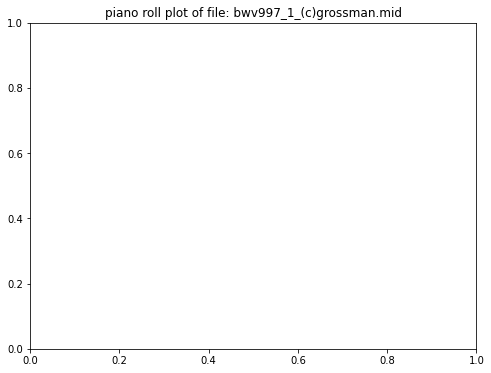

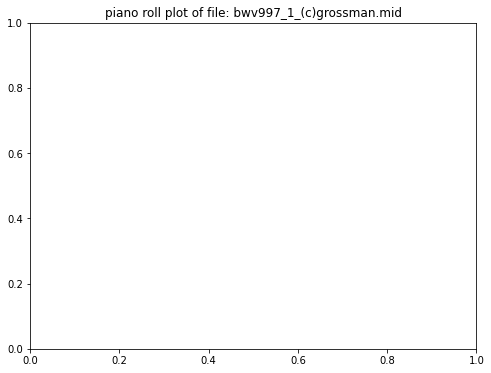

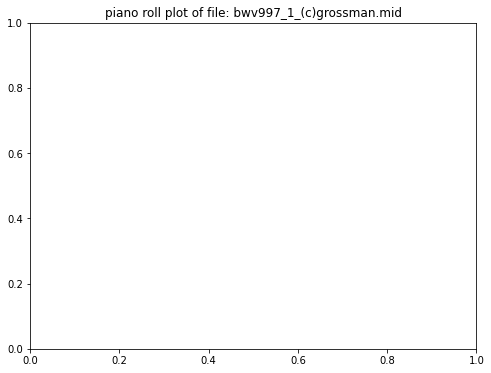

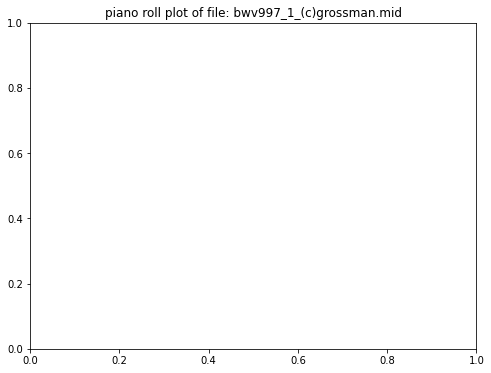

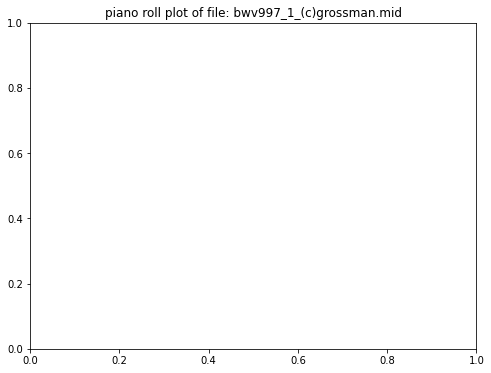

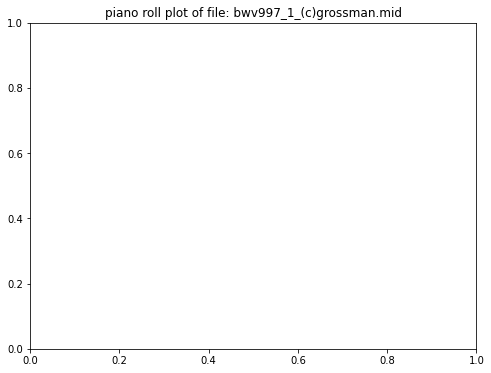

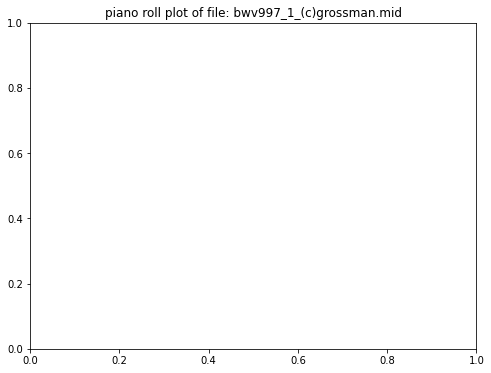

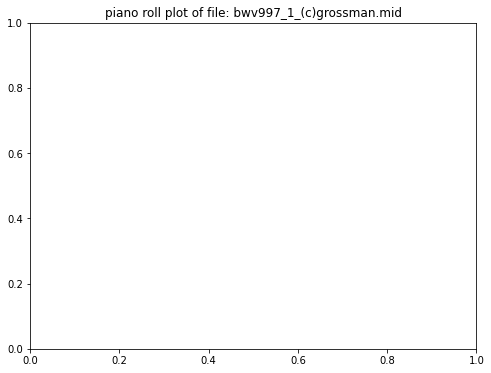

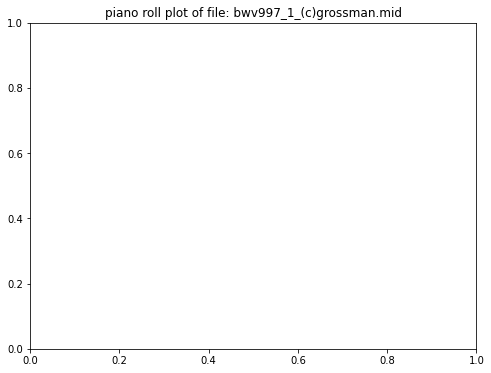

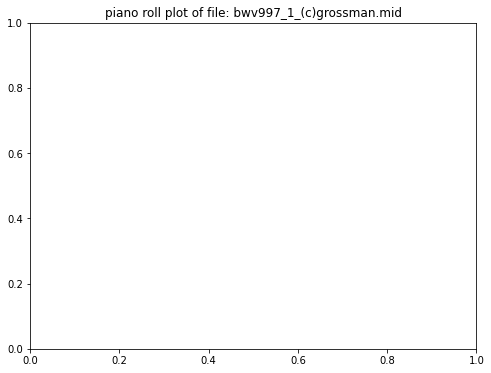

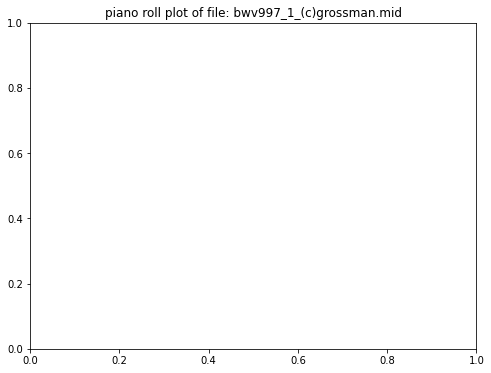

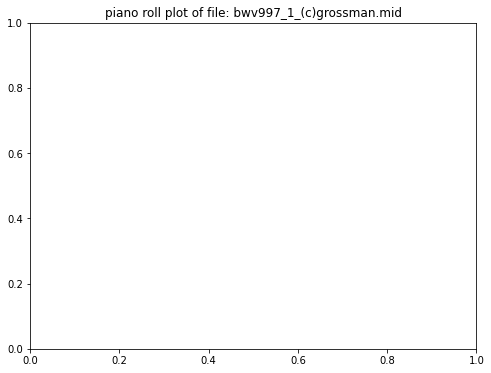

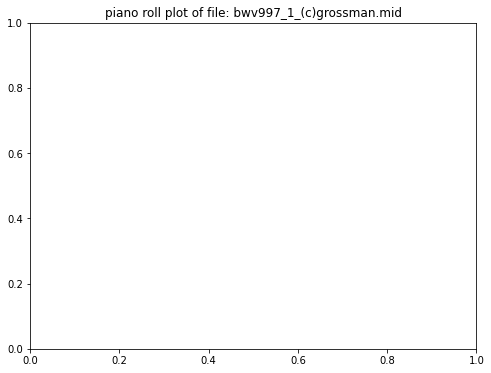

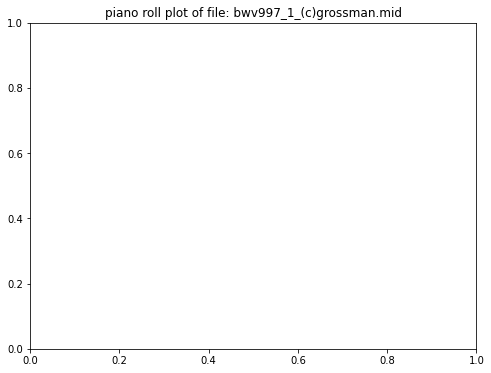

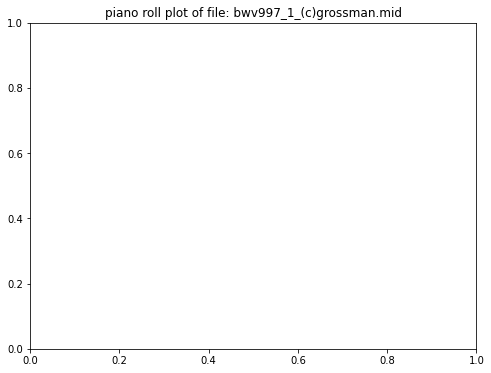

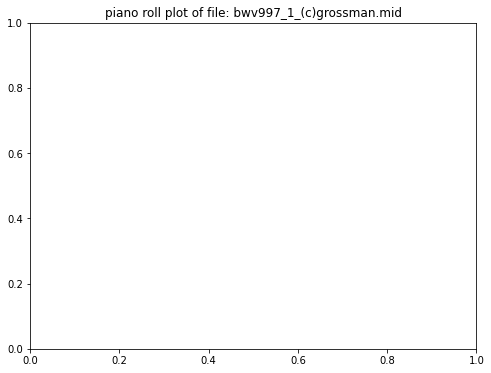

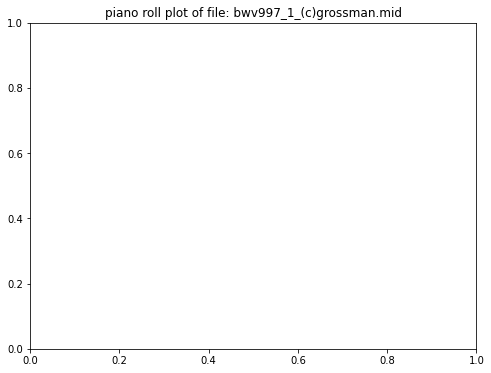

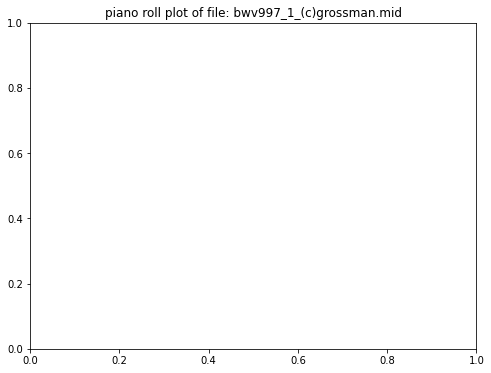

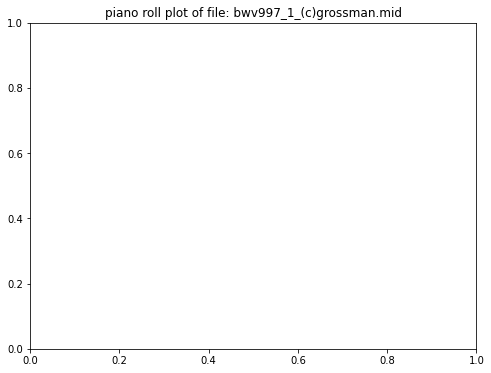

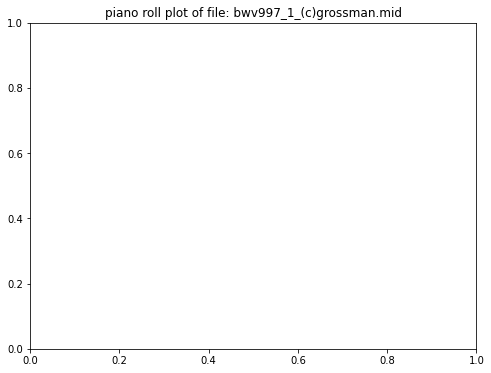

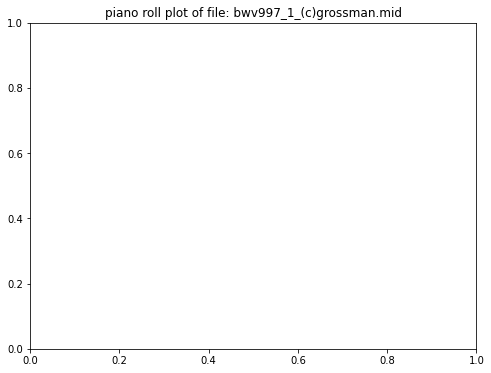

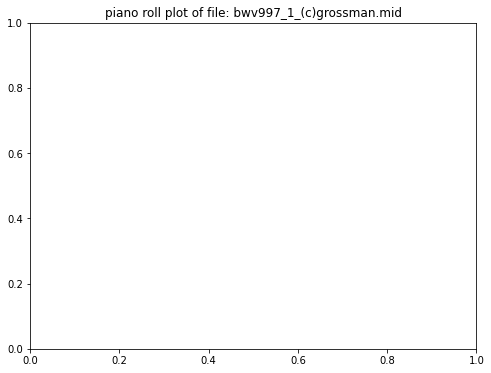

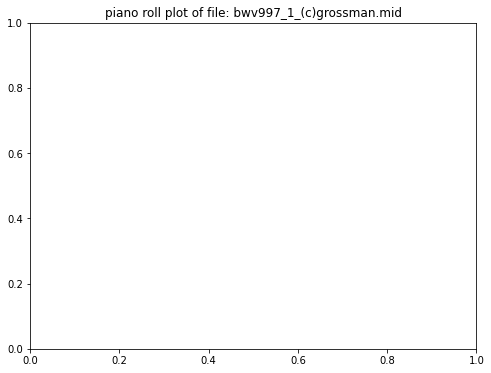

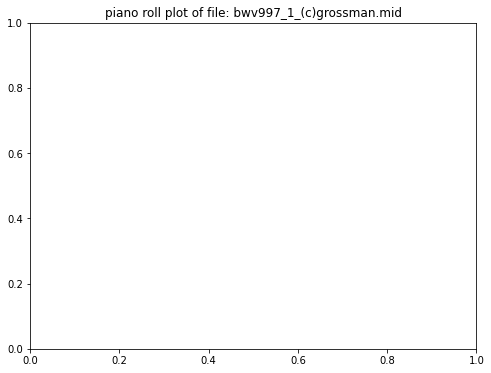

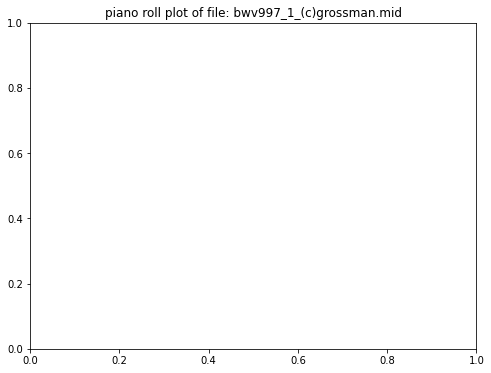

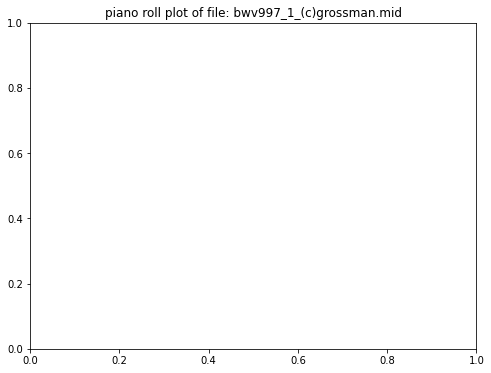

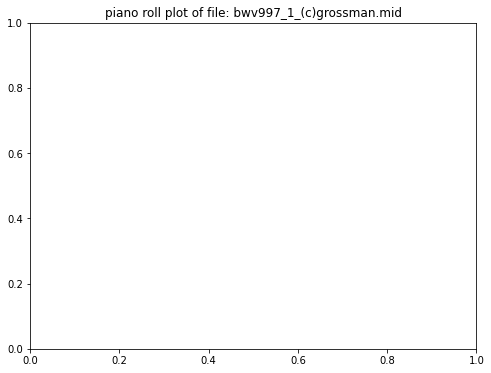

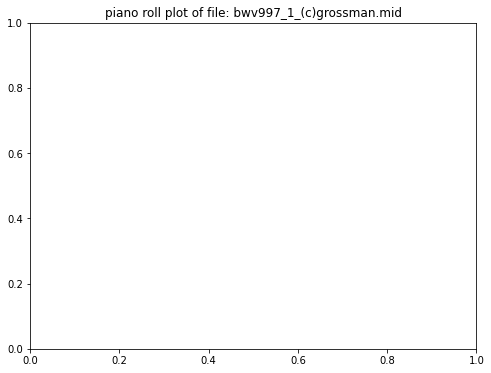

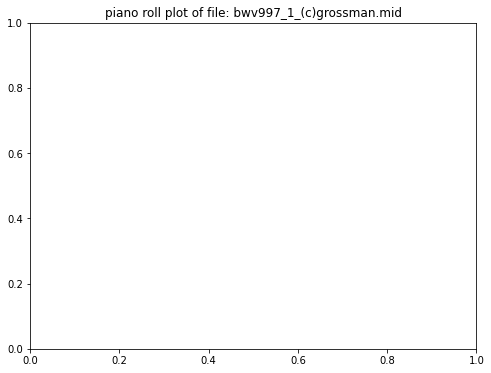

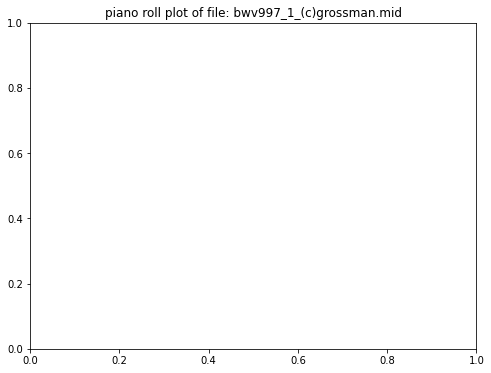

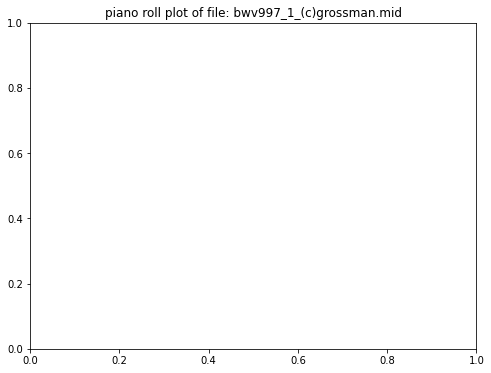

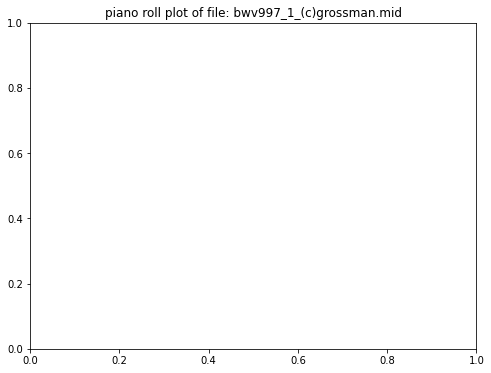

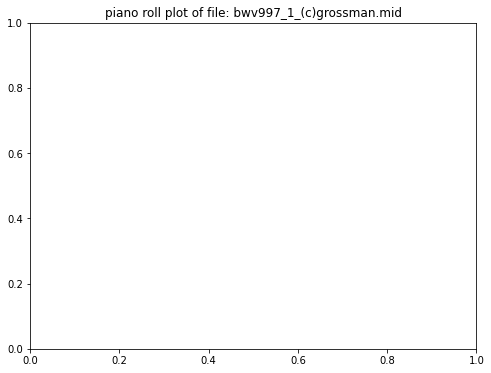

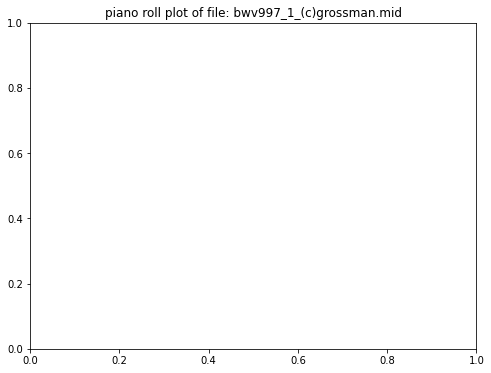

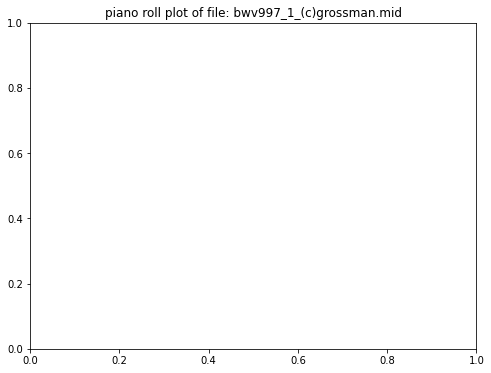

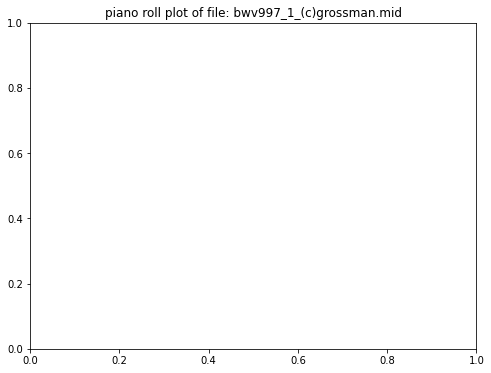

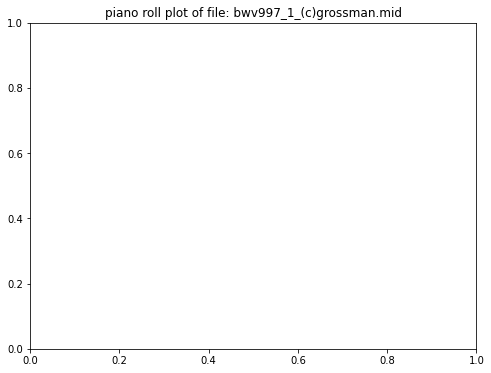

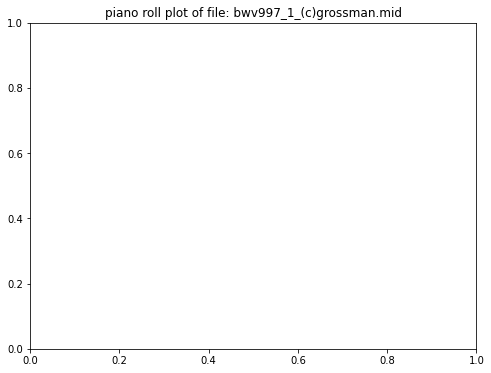

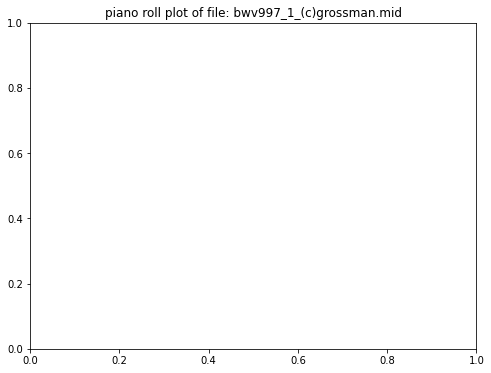

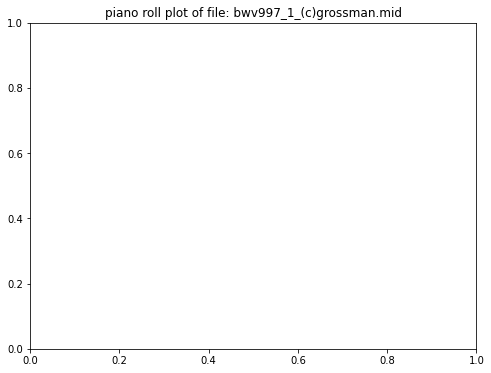

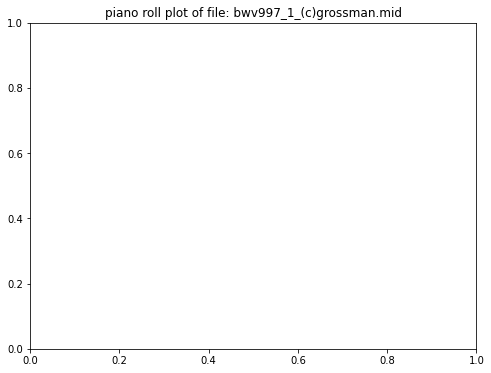

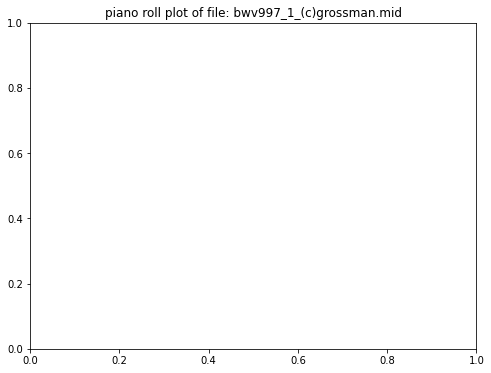

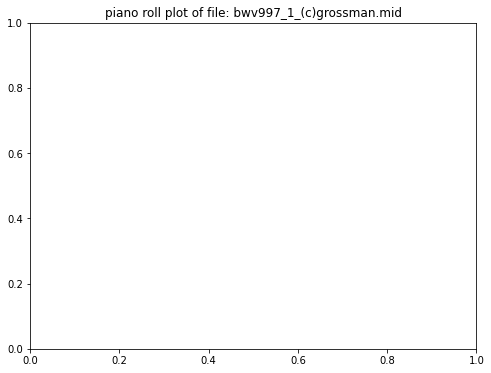

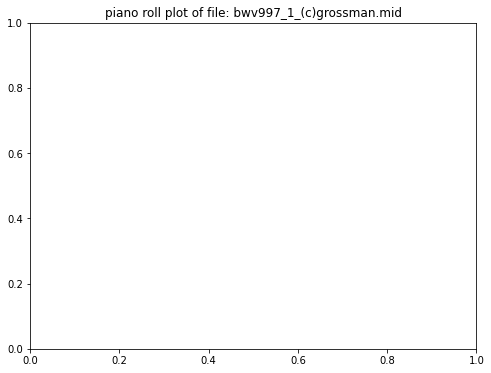

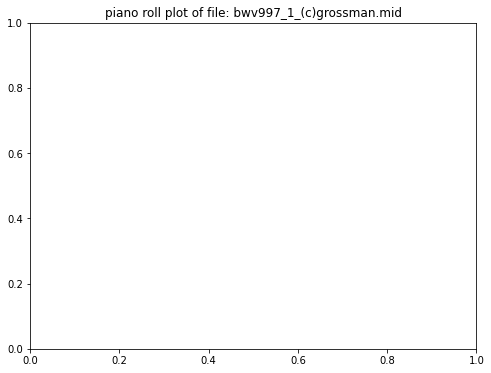

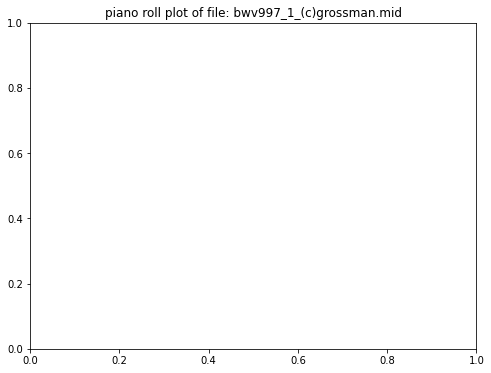

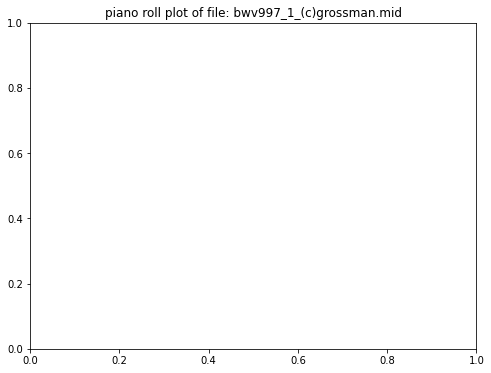

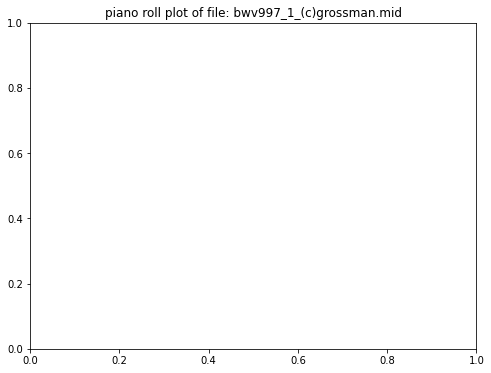

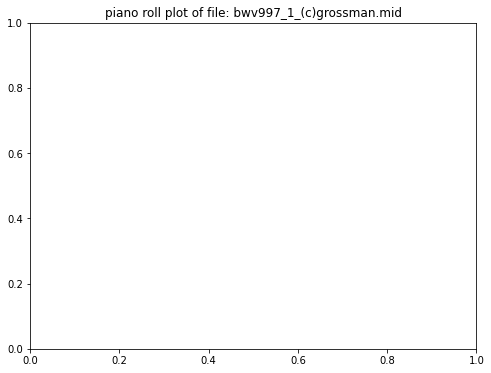

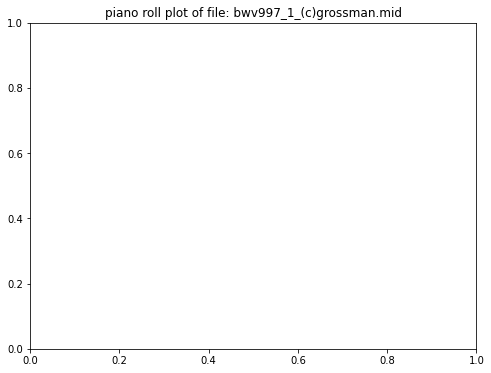

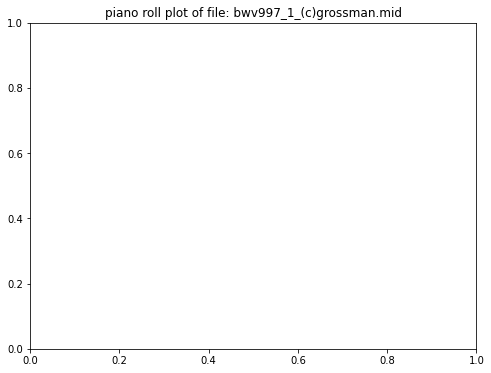

In [16]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_test, y_test) = get_test_data()
(x_train, y_train) = get_train_data()


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

In [0]:
#@title
'''
===========================================================
Utility Functions
'''

def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])
    

def plot_compare_histories(history_list, name_list, plot_accuracy=True):
    dflist = []
    min_epoch = len(history_list[0].epoch)
    losses = []
    for history in history_list:
        h = {key: val for key, val in history.history.items() if not key.startswith('val_')}
        dflist.append(pd.DataFrame(h, index=history.epoch))
        min_epoch = min(min_epoch, len(history.epoch))
        losses.append(h['loss'][-1])

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx
    
    plt.figure(figsize=(6, 8))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Training Loss: " + ' vs '.join([str(round(x, 3)) for x in losses]))
    
    if plot_accuracy:
        ax = plt.subplot(212)
        historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epochs")
    
    plt.xlim(0, min_epoch-1)
    plt.tight_layout()






In [18]:

input_size = 1280000
hidden_size = 256
code_size = 64

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_train = autoencoder.fit(x_train, x_train, epochs=5)


# plot_autoencoder_outputs(autoencoder, 5, (128, 10000))

# weights = autoencoder.get_weights()[0].T

# n = 10
# plt.figure(figsize=(20, 5))
# for i in range(n):
#     ax = plt.subplot(1, n, i + 1)
#     plt.imshow(weights[i+0].reshape(28, 28))
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)



Epoch 1/5
92/92 [==============================] - 21s 226ms/step - loss: 0.6931
Epoch 2/5
92/92 [==============================] - 10s 105ms/step - loss: 0.6777
Epoch 3/5
92/92 [==============================] - 8s 91ms/step - loss: 0.3060
Epoch 4/5
92/92 [==============================] - 8s 87ms/step - loss: 0.0931
Epoch 5/5
92/92 [==============================] - 8s 91ms/step - loss: 0.1107


In [6]:
autoencoder_half = Model(input_img, code)
pred = autoencoder_half.predict(x_test)
print(pred.shape)

(26, 64)


In [7]:
data = pred
labels = y_test

np.random.seed(42)

# X_digits, y_digits = load_digits(return_X_y=True)
# print("X_digits shape: {}".format(X_digits.shape))
# print("y_digits shape: {}".format(y_digits.shape))
# data = scale(X_digits)
print("data shape: {}".format(data.shape))

n_samples, n_features = data.shape
n_digits = len(np.unique(labels))
# n_digits = len(np.unique(y_digits))
# labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


data shape: (26, 64)
n_digits: 2, 	 n_samples 26, 	 n_features 64


In [0]:
from time import time

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



In [9]:
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print(labels)
    print(estimator.labels_)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')


__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1]
k-means++	0.03s	416674	0.499	0.517	0.507	0.459	0.492	0.665
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0]
random   	0.02s	416674	0.499	0.517	0.507	0.459	0.492	0.665
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1]
PCA-based	0.00s	416674	0.499	0.517	0.507	0.459	0.492	0.665
__________________________________________________________________________________
